# Data discretization

In [2]:
# modules used
import numpy as np
import pandas as pd
import pickle
import os
import re
import operator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# read data if not existing yet
# THIS TAKES A DECENT AMOUNT OF TIME
# USE THE .pkl FILE
if os.path.exists("task3.pkl"):
    data = pd.read_pickle("task3.pkl")
    
else:
    file = open('capture20110818.pcap.netflow.labeled', 'r')
    header = file.readline()
    header = ' '.join(header.split()).split(' ')
    rows_list = []
#     data = pd.DataFrame(columns=["Date", "Start", "Dur", "Prot", "Src", "PortSrc", "Dest", 
#                                  "PortDest", "Flags", "Tos", "Packets", "Bytes", "Flows", "Label"])
    for line in file:
        dict = {}
        words = ' '.join(line.split()).split(' ')
        if len(words) >= 13:
            if words[12] == "Background":
                continue
        elif words[11] == "Background":
                continue
        # split ip adress on adress and port
        dest = words[6].split(':')
        src = words[4].split(':')
        dict["Date"] = words[0]
        dict["Start"] = words[1]
        dict["Dur"] = words[2]
        dict["Prot"] = words[3]
        dict["Src"] = src[0]
        if len(src) > 1:
            dict["PortSrc"] = src[1]
        else:
            dict["PortSrc"] = None
        dict["Dest"] = dest[0]
        if len(dest) > 1:
            dict["PortDest"] = dest[1]
        else:
            dict["PortDest"] = None
        if len(words) == 13:
            dict["Flags"] = words[7]
            dict["Tos"] = words[8]
            dict["Packets"] = words[9]
            dict["Bytes"] = words[10]
            dict["Flows"] = words[11]
            dict["Label"] = words[12]
        elif words[7] == "S_" or words[7] == "SRPA_":
            dict["Flags"] = words[7]
            dict["Tos"] = words[8]
            dict["Packets"] = words[9]
            dict["Bytes"] = words[10]
            dict["Flows"] = words[11]
            dict["Label"] = words[12]
            
        else:
            dict["Flags"] = None
            dict["Tos"] = words[7]
            dict["Packets"] = words[8]
            dict["Bytes"] = words[9]
            dict["Flows"] = words[10]
            dict["Label"] = words[11]
        rows_list.append(dict)
    data = pd.DataFrame(rows_list, columns=["Date", "Start", "Dur", "Prot", "Src", "PortSrc", "Dest", 
                                 "PortDest", "Flags", "Tos", "Packets", "Bytes", "Flows", "Label"])
    data.to_pickle("task3.pkl")

data.head(100)

,Date,Start,Dur,Prot,Src,PortSrc,Dest,PortDest,Flags,Tos,Packets,Bytes,Flows,Label
0,2011-08-18,10:19:13.347,4.985,TCP,147.32.80.13,80,147.32.85.88,56949,PA_,0,91,86277,1,LEGITIMATE
1,2011-08-18,10:19:13.392,0.000,TCP,147.32.86.110,48102,74.125.232.214,443,A_,0,1,66,1,LEGITIMATE
2,2011-08-18,10:19:13.411,4.921,TCP,147.32.85.88,56949,147.32.80.13,80,A_,0,49,3234,1,LEGITIMATE
3,2011-08-18,10:19:13.460,4.742,TCP,147.32.84.59,2768,74.125.108.208,80,A_,0,118,7080,1,LEGITIMATE
4,2011-08-18,10:19:13.486,0.000,TCP,147.32.84.59,56058,74.125.232.215,443,A_,0,1,60,1,LEGITIMATE
5,2011-08-18,10:19:13.689,4.434,TCP,147.32.84.164,34588,195.24.232.164,80,A_,0,30,1980,1,LEGITIMATE
6,2011-08-18,10:19:13.848,0.000,TCP,147.32.86.110,53538,74.125.232.215,443,A_,0,1,66,1,LEGITIMATE
7,2011-08-18,10:19:13.858,0.174,TCP,147.32.84.59,37578,74.125.232.215,443,PA_,0,5,559,1,LEGITIMATE
8,2011-08-18,10:19:14.067,0.009,TCP,147.32.85.26,58763,209.85.148.147,80,FA_,0,2,120,1,LEGITIMATE
9,2011-08-18,10:19:14.134,0.000,TCP,147.32.84.21,44146,74.125.232.216,443,A_,0,1,66,1,LEGITIMATE


# Data exploration
We check one infected host to pick two features that are most relevant for classification

In [4]:
# for every category, we checked how often something occurs for one infected host and for one normal host
categories = ["Date", "Start", "Dur", "Prot", "Src", "PortSrc", "Dest", 
                "PortDest", "Flags", "Tos", "Packets", "Bytes", "Flows", "Label"]
infected_host = "147.32.84.191"
non_infected = "147.32.96.69"
infected_data = data.loc[(data["Src"] == infected_host) | data["Dest"].isin([infected_host]), :]
non_infected_data = data.loc[(data["Src"] == non_infected) | data["Dest"].isin([non_infected]), :]
list_infected = []
list_non_infected = []
for cat in categories:
    print cat
    list_non_infected.append(non_infected_data[cat].value_counts())
    list_infected.append(infected_data[cat].value_counts())


Date
Start
Dur
Prot
Src
PortSrc
Dest
PortDest
Flags
Tos
Packets
Bytes
Flows
Label


In [5]:
# aggregated features
data['UniqueIPDests'] = None
data['UniquePortDests'] = None
unique_ips = data.Src.unique()
for ip in unique_ips:
    temp = data.loc[data['Src'] == ip]
    destinations = temp.Dest.unique()
    dest_ports = temp.PortDest.unique()
    data["UniqueIPDests"].loc[data['Src'] == ip] = len(destinations)
    data["UniquePortDests"].loc[data['Src'] == ip] = len(dest_ports)

C:\Users\pasca\Anaconda3\envs\py27\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


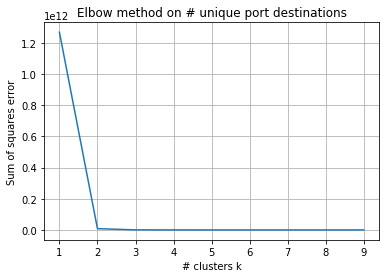

In [39]:
# with code below we determined the optimal number of bins for numerical features
clusters = range(1,10)
errors = []

for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster).fit(data['UniquePortDests'].values.reshape(-1, 1))
    errors.append(kmeans.inertia_)

# plot elbow
fig = plt.figure()
plt.plot(np.arange(1,10), errors)
plt.grid(True)
plt.xlabel('# clusters k')
plt.ylabel('Sum of squares error')
plt.title('Elbow method on # unique port destinations')
plt.savefig("elbowuniqueport.png")

In [6]:
# get values for percentiles
bins_dur = []
bins_packets = []
bins_bytes = []
bins_agg_ip = []
bins_agg_port = []

for percentile in [33, 67]:
    bins_dur.append(np.percentile(data['Dur'].astype("float"), percentile))
    bins_packets.append(np.percentile(data['Packets'].astype("int"), percentile))
    bins_agg_ip.append(np.percentile(data['UniqueIPDests'].astype("int"), percentile))
    
for percentile in [25, 50, 75]:
    bins_bytes.append(np.percentile(data['Bytes'].astype("int"), percentile))
    
for percentile in [50]:
    bins_agg_port.append(np.percentile(data['UniquePortDests'].astype("int"), percentile))
    
# assign which bin the sample should be in
def binning(data, bins):
    for bin, boundary in enumerate(bins):
        if data <= boundary:
            return bin
    return len(bins)

data['DurDiscrete'] = data['Dur'].astype("float").apply(lambda data: binning(data, bins_dur))
data['PacketsDiscrete'] = data['Packets'].astype("int").apply(lambda data: binning(data, bins_packets))
data['BytesDiscrete'] = data['Bytes'].astype("int").apply(lambda data: binning(data, bins_bytes))
data['UniqueIPDestDiscrete'] = data['UniqueIPDests'].astype("int").apply(lambda data: binning(data, bins_agg_ip))
data['UniquePortDestDiscrete'] = data['UniquePortDests'].astype("int").apply(lambda data: binning(data, bins_agg_port))

print data['DurDiscrete'].value_counts()
print data['PacketsDiscrete'].value_counts()
print data['BytesDiscrete'].value_counts()
print data['UniqueIPDestDiscrete'].value_counts()
print data['UniquePortDestDiscrete'].value_counts()

data.head(100)

0    390473
2    212918
1     41967
Name: DurDiscrete, dtype: int64
0    376399
2    187745
1     81214
Name: PacketsDiscrete, dtype: int64
1    310227
0    161462
3    161287
2     12382
Name: BytesDiscrete, dtype: int64
0    248841
2    209092
1    187425
Name: UniqueIPDestDiscrete, dtype: int64
0    373024
1    272334
Name: UniquePortDestDiscrete, dtype: int64


,Date,Start,Dur,Prot,Src,PortSrc,Dest,PortDest,Flags,Tos,...,Bytes,Flows,Label,UniqueIPDests,UniquePortDests,DurDiscrete,PacketsDiscrete,BytesDiscrete,UniqueIPDestDiscrete,UniquePortDestDiscrete
0,2011-08-18,10:19:13.347,4.985,TCP,147.32.80.13,80,147.32.85.88,56949,PA_,0,...,86277,1,LEGITIMATE,53,6104,2,2,3,2,1
1,2011-08-18,10:19:13.392,0.000,TCP,147.32.86.110,48102,74.125.232.214,443,A_,0,...,66,1,LEGITIMATE,43,2,0,0,0,1,0
2,2011-08-18,10:19:13.411,4.921,TCP,147.32.85.88,56949,147.32.80.13,80,A_,0,...,3234,1,LEGITIMATE,4,2,2,2,3,0,0
3,2011-08-18,10:19:13.460,4.742,TCP,147.32.84.59,2768,74.125.108.208,80,A_,0,...,7080,1,LEGITIMATE,208,11,2,2,3,2,0
4,2011-08-18,10:19:13.486,0.000,TCP,147.32.84.59,56058,74.125.232.215,443,A_,0,...,60,1,LEGITIMATE,208,11,0,0,0,2,0
5,2011-08-18,10:19:13.689,4.434,TCP,147.32.84.164,34588,195.24.232.164,80,A_,0,...,1980,1,LEGITIMATE,155,22,2,2,3,2,1
6,2011-08-18,10:19:13.848,0.000,TCP,147.32.86.110,53538,74.125.232.215,443,A_,0,...,66,1,LEGITIMATE,43,2,0,0,0,1,0
7,2011-08-18,10:19:13.858,0.174,TCP,147.32.84.59,37578,74.125.232.215,443,PA_,0,...,559,1,LEGITIMATE,208,11,2,2,1,2,0
8,2011-08-18,10:19:14.067,0.009,TCP,147.32.85.26,58763,209.85.148.147,80,FA_,0,...,120,1,LEGITIMATE,49,3,1,1,0,2,0
9,2011-08-18,10:19:14.134,0.000,TCP,147.32.84.21,44146,74.125.232.216,443,A_,0,...,66,1,LEGITIMATE,43,4,0,0,0,1,0


# Sequential Model (N-Gram)

In [70]:
#Set the parameters.
n = 3
# The first ip is the profile.
host_list = ["147.32.84.165", "147.32.84.191", "147.32.84.192", "147.32.84.193", "147.32.84.204",
             "147.32.84.205","147.32.84.206","147.32.84.207","147.32.84.208","147.32.84.209"]
list_of_dict = {}
sizes = {}

#Create the dictionaries for the hosts.
for ip in unique_ips:
    d = {}
    df = data.loc[(data["Src"] == ip), :]
    col = df["Prot"]
    size = len(df) - n
    if size < 3: continue
    sizes[ip] = size
    #Fill the dictionary
    for i in range(0, size):
        gram = ''.join(string for string in col[i:i+n])
        if gram not in d:
            d[gram] = 0
        d[gram] += (1.0 / size)
    #add dictionary
    list_of_dict[ip] = d

In [71]:
#Compute the distances between dictionaries and the profile
profile = list_of_dict.pop("147.32.84.165")
distances = {}
for d in list_of_dict:
    dist = 0
    seen = {}
    for k in list_of_dict[d]:
        print k
        try:
            dist += (list_of_dict[d[k]] - profile[k])**2
        except:
            dist += (1.0 / sizes[d])
        seen[k] = 1
    for k in profile:
        if k not in seen:
            try:
                dist += (list_of_dict[d[k]] - profile[k])**2
            except:
                dist += (1.0 / sizes[d])
    distances[d] = dist
        

TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
ICMPICMPTCP
TCPTCPICMP
ICMPICMPICMP
TCPICMPICMP
ICMPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPICMP
ICMPICMPICMP
TCPICMPICMP
ICMPICMPTCP
ICMPTCPTCP
TCPTCPTCP
ICMPUDPTCP
UDPUDPTCP
UDPTCPTCP
ICMPICMPTCP
TCPUDPUDP
TCPTCPUDP
UDPUDPUDP
UDPTCPICMP
TCPTCPICMP
UDPTCPUDP
ICMPUDPUDP
ICMPICMPUDP
ICMPICMPICMP
ICMPTCPTCP
ICMPTCPICMP
TCPUDPTCP
TCPICMPICMP
TCPICMPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
ICMPICMPTCP
TCPTCPICMP
TCPICMPTCP
ICMPICMPICMP
ICMPTCPICMP
TCPICMPICMP
ICMPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCPTCPTCP
TCP

In [85]:
#Threshold the distances and classify as an infected host.
threshold = np.percentile(distances.values(), 5)
tp = 0
fp = 0
tn = 0
fn = 0
for key in distances:
    if distances[key] < threshold:
        if key in host_list:
            tp += 1
        else:
            fp += 1
    else:
        if key in host_list:
            fn += 1
        else:
            tn += 1
print(tp)
print(fp)
print(tn)
print(fn)

9
8
310
0


In [74]:
print distances

{'147.32.86.172': 0.014625228519195616, '147.32.85.2': 0.5714285714285713, '188.175.169.225': 5.333333333333332, '90.183.39.17': 1.4545454545454544, '147.32.85.7': 0.00827300930713547, '147.32.85.6': 0.05442176870748297, '147.32.85.5': 0.010818120351588911, '147.32.84.189': 0.0326530612244898, '147.32.85.8': 0.002415458937198067, '69.63.189.11': 0.19277108433734944, '77.75.72.22': 1.4545454545454544, '74.125.232.198': 0.16, '192.100.112.203': 2.666666666666666, '62.245.67.254': 2.285714285714285, '67.195.115.43': 0.05517241379310345, '211.140.164.103': 2.0, '72.14.199.57': 1.333333333333333, '147.32.84.59': 0.00018772706693022075, '147.32.86.176': 0.06751054852320673, '74.125.232.192': 2.666666666666666, '74.125.232.193': 0.5714285714285713, '74.125.232.194': 0.6666666666666665, '74.125.232.195': 0.45714285714285724, '74.125.232.196': 0.64, '117.241.11.209': 3.2000000000000006, '147.32.86.23': 0.08205128205128205, '147.32.87.223': 0.6666666666666665, '121.11.80.162': 2.0, '147.32.86.15